# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
# !ls

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
import numpy as np
import random 
from collections import deque, namedtuple



In [8]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e5) # replay buffer size
BATCH_SIZE = 64        # batch size
GAMMA = 0.99           # discount factor
TAU = 1e-3             # for soft update of target parameters
LR = 5e-4              # Learning rate   
UPDATE_EVERY = 4       # how often update the network 

device  = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print (device)


In [9]:
from ddqn_agent import Double_DQN_Agent
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [10]:

def dueling_banana_dqn(agent, n_episodes = 1000, max_t = 300, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, random = 0, train=True):
    dueling_agent = agent
    scores = [] #a list containing scores for all each episode.
    scores_window = deque(maxlen = 100)
    scores_mean = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        
        for t in range(max_t-1):
            action = dueling_agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                dueling_agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:
                print (t)                  # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))

        eps = max(eps_end, eps * eps_decay)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode == 750:
            print('Save model in 750 episodes')
            torch.save(dueling_agent.qnetwork_local.state_dict(), 'dueling_mid_checkpoint.pth')
        if scores_mean[-1] > 13.0:
            print (f'Solved in {i_episode}')
        if train:
            torch.save(dueling_agent.qnetwork_local.state_dict(), 'dueling_checkpoint.pth')
    return scores, scores_mean



In [12]:
eight_init_list = []
for random_init in range(1):
    print('ROUND{}-----------------'.format(random_init))
    random = random_init*random_init
    dueling_agent = Double_DQN_Agent(state_size = 37, action_size = 4, seed = random, network_type = 'Dueling', filename=None)

    _,scores_mean = dueling_banana_dqn(dueling_agent, random = random)
    eight_init_list.append(scores_mean)
    


ROUND0-----------------
Using double Dueling network
Episode 100	Average Score: 0.48
Episode 200	Average Score: 3.90
Episode 300	Average Score: 7.27
Episode 400	Average Score: 11.14
Episode 467	Average Score: 13.02Solved in 467
Episode 468	Average Score: 13.05Solved in 468
Episode 469	Average Score: 13.01Solved in 469
Episode 471	Average Score: 13.06Solved in 471
Episode 472	Average Score: 13.12Solved in 472
Episode 473	Average Score: 13.05Solved in 473
Episode 474	Average Score: 13.10Solved in 474
Episode 475	Average Score: 13.13Solved in 475
Episode 476	Average Score: 13.15Solved in 476
Episode 477	Average Score: 13.23Solved in 477
Episode 478	Average Score: 13.26Solved in 478
Episode 479	Average Score: 13.19Solved in 479
Episode 480	Average Score: 13.12Solved in 480
Episode 481	Average Score: 13.15Solved in 481
Episode 482	Average Score: 13.19Solved in 482
Episode 483	Average Score: 13.22Solved in 483
Episode 484	Average Score: 13.07Solved in 484
Episode 485	Average Score: 13.20Solv

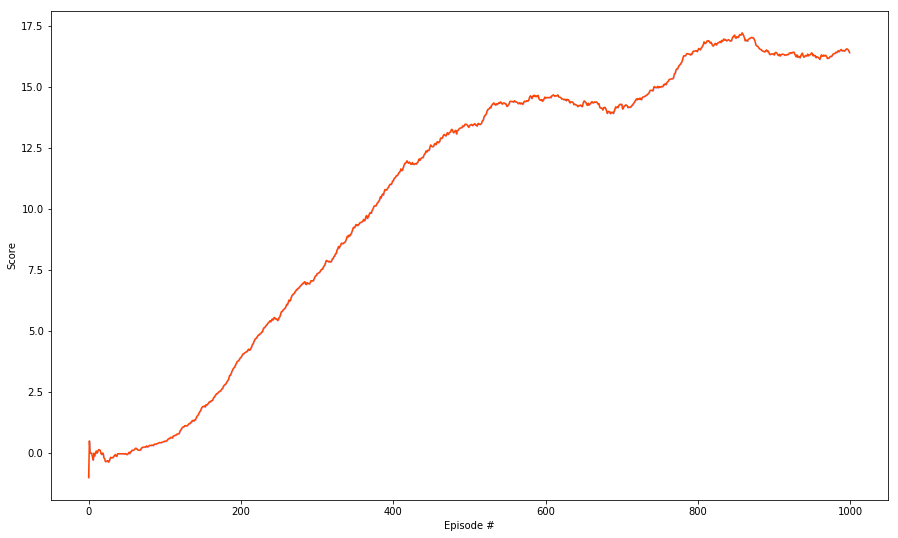

In [13]:
duel_down , duel_median, duel_up = np.percentile(np.array(eight_init_list),[25,50,75], axis=0)


figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)


plt.plot(np.arange(len(duel_median)), duel_median, color='orangered' )

plt.fill_between(np.arange(len(duel_median)),duel_up,duel_down,color='b',alpha = 0.2)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('dueling_dqn.png')
plt.show()

In [ ]:
agent = Double_DQN_Agent(state_size=state_size, action_size=action_size, seed=0, filename='dueling_checkpoint.pth')
_, scores_mean = dueling_banana_dqn(agent, n_episodes=2, random=0, train=False)

Using double Dueling network
Episode 2	Average Score: 17.50Solved in 2
Episode 3	Average Score: 19.00Solved in 3
Episode 4	Average Score: 17.50Solved in 4
Episode 5	Average Score: 16.40Solved in 5
Episode 6	Average Score: 16.67Solved in 6
Episode 7	Average Score: 16.86Solved in 7
Episode 8	Average Score: 17.00Solved in 8
Episode 9	Average Score: 16.67Solved in 9
Episode 10	Average Score: 16.90Solved in 10
Episode 11	Average Score: 16.82Solved in 11
Episode 12	Average Score: 16.75Solved in 12
Episode 13	Average Score: 17.08Solved in 13
Episode 14	Average Score: 17.14Solved in 14
Episode 15	Average Score: 17.07Solved in 15
Episode 16	Average Score: 16.94Solved in 16
Episode 17	Average Score: 16.94Solved in 17
Episode 18	Average Score: 16.06Solved in 18
Episode 19	Average Score: 15.89Solved in 19
Episode 20	Average Score: 16.00Solved in 20
Episode 21	Average Score: 15.95Solved in 21
Episode 22	Average Score: 15.36Solved in 22
Episode 23	Average Score: 15.61Solved in 23
Episode 24	Average 

In [ ]:
scores_mean

In [ ]:
_